In [47]:

#Bu kod, TFIM simülasyonlarını gerçekleştirmek için temel bir altyapı sağlar 
# ve kuantum hesaplamada simülasyonlar yaparak fiziksel sistemlerin davranışlarını anlamak için kullanılabilir.
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate, UnitaryGate
import numpy as np
#Y kapılarının tanımlanması 
SYGate=UnitaryGate(YGate().power(1/2), label=r"$\sqrt{Y}$")
SYdgGate=UnitaryGate(SYGate.inverse(), label=r"$\sqrt{Y}^\dag$")
# num_qubits: Devredeki qubit sayısı.
# num_trotter_steps: Trotter adımı sayısı.
# rx_angle: Her Trotter adımında RX kapısının uygulanacağı açı.
def generate_Id_tfim_circuit(num_qubits, num_trotter_steps, rx_angle,tortter_barriers=False,layer_barriers=False):
    qc=QuantumCircuit(num_qubits)
    #Trotter devresi oluşturma fonksiyonu
    for trotter_step in range(num_trotter_steps):
        add_Id_tfim_trotter_layer(qc,rx_angle,layer_barriers)
    return qc
    #trotter katmanı ekleme fonksiyonu
def add_Id_tfim_trotter_layer(qc,rx_ange,layer_barriers=False):
    #çift indeksli qubitlere rzz ekelme
    for i in range(0,qc.num_qubits-1,2):
        qc.sdg([i, i+1])
        qc.append(SYGate,[i+1])
        qc.cx(i,i+1)
        qc.append(SYdgGate,[i+1])
    if layer_barriers:
        qc.barrier()
    #tek katmanlı qubitlere rzz ekleme
    for i in range(1,qc.num_qubits-1,2):
        qc.sdg([i, i+1])
        qc.append(SYGate,[i+1])
        qc.cx(i,i+1)
        qc.append(SYdgGate,[i+1])
    if layer_barriers:
        qc.barrier()
    qc.rx(rx_ange, list(range(qc.num_qubits)))
    if layer_barriers:
        qc.barriers()


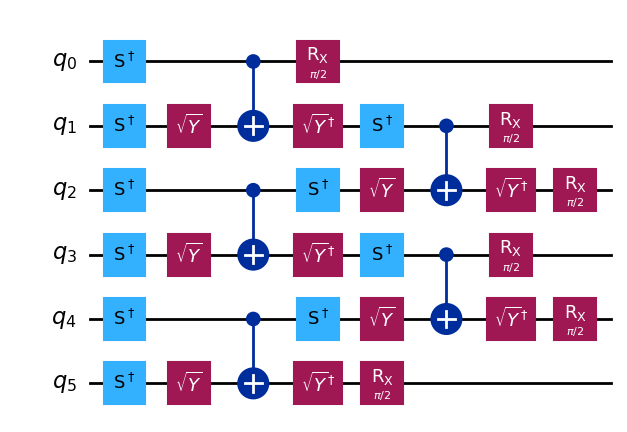

In [48]:
#parametre tanımlanması
num_qubits=6
num_trotter_steps=1
rx_angle=0.5*np.pi
#devre oluşturma
qc=generate_Id_tfim_circuit(num_qubits,num_trotter_steps,rx_angle)
#devre çizdirme
qc.draw(output='mpl',fold=-1)

# Demo: Sampler

In [49]:

# #Bu kod, TFIM simülasyonlarını gerçekleştirmek için temel bir altyapı sağlar 
# # ve kuantum hesaplamada simülasyonlar yaparak fiziksel sistemlerin davranışlarını anlamak için kullanılabilir.
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate, UnitaryGate
import numpy as np
# #Y kapılarının tanımlanması 
# SYGate=UnitaryGate(YGate().power(1/2), label=r"$\sqrt{Y}$")
# SYdgGate=UnitaryGate(SYGate.inverse(), label=r"$\sqrt{Y}^\dag$")
# # num_qubits: Devredeki qubit sayısı.
# # num_trotter_steps: Trotter adımı sayısı.
# # rx_angle: Her Trotter adımında RX kapısının uygulanacağı açı.
# def append_mirrored_Id_tfim_circuit(num_qubits, num_trotter_steps, rx_angle,trotter_barriers=False,layer_barriers=False):
#     qc=QuantumCircuit(num_qubits)
#     #Trotter devresi oluşturma fonksiyonu
#     for trotter_step in range(num_trotter_steps):
#         add_mirrored_Id_tfim_trotter_layer(qc,rx_angle,layer_barriers)
#         if trotter_barriers:
#             qc.barrier()
#     #trotter katmanı ekleme fonksiyonu
# def add_mirrored_Id_tfim_trotter_layer(qc,rx_angle,layer_barriers=False):
#     #çift indeksli qubitlere rzz ekelme
#     qc.rx(-rx_angle, list(range(qc.num_qubits)))
#     if layer_barriers:
#         qc.barriers()
#     for i in range(1,qc.num_qubits-1,2):
#         qc.append(SYGate,[i+1])
#         qc.sdg([i, i+1])
#         qc.append(SYdgGate,[i+1])
#         qc.s(i,i+1)
#     if layer_barriers:
#         qc.barrier()
#     for i in range(0,qc.num_qubits-1,2):
#         qc.append(SYGate,[i+1])
#         qc.sdg([i, i+1])
#         qc.append(SYdgGate,[i+1])
#         qc.s(i,i+1)
#     if layer_barriers:
#         qc.barrier()
#     #tek katmanlı qubitlere rzz ekleme
   


In [50]:
# append_mirrored_Id_tfim_circuit(qc,num_qubits,num_trotter_steps,rx_angle,trotter_barriers=True,layer_barriers=True)
# qc.draw(output='mpl',fold=-1)


In [51]:
#problem ile circuit birleştirme


In [52]:
#Optimize IBM'e optimize etme ve ID gösterme 
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService

# backend_name="**"
# service=QiskitRuntimeService()
# backand=service.get_backend(backend_name)
# print("done getting the backend")

# qc_transpiled_list=transpile(qc_list, backend=backend, optimization_level=1)

# from qiskit_ibm_runtime import SamplerV2 as sampler

# sampler=sampler(backend=backend)
# sampler.options.dynamical_decoupling.enable=True
# sampler.options.dynamical_decoupling.sequence_type="XY4"

# job=sampler.run(qc_transpiled_list)
# print(job.job_id())


In [53]:
# #post-processing and plotting
from qiskit_ibm_runtime import QiskitRuntimeService
# service=QiskitRuntimeService()
# job_id="**"
# job=service.job(job_id)

# survival_probability_list=[]
# for trotter_step in range(max_trotter_steps):
#     try:
#         data=jop.result(){trotter_step}.data
#         survival_probability_list.append(data.c.get_counts()["0"+len(mansured_qubitts)]/data.c.num_shots)
#     except:
#         survival_probability_list.append(0)



In [54]:
# import matplotlib.pyplot as plt
#X eksenindeki değerleri oluşturur. Bu değerler 0'dan başlayarak 4 adım aralıklarla 4*max_trotter_steps kadar devam eder.
# plt.plot(list(range(0,4*max_trotter_steps,4)),survival_probability_list,'--0')
# plt.xlabel('20 gate depth')
# plt.ylabel('survival probability of the all -0 ')
#  X eksenindeki tiklerin konumlarını belirler. Bu, 0'dan 44'e kadar olan değerler arasında 4 adım aralıklarla tikler yerleştirir.
# plt.xticks(np.arange(0,44,4))
# plt.show()

In [5]:
# #mapping the problem
# from qiskit import QuantumCircuit
# from qiskit.circuit import Parameter
# from qiskit.circuit.library import YGate, UnitaryGate
#kuantum fizği çözme problemlerini çözmek için kullanımına örnek

# rx_angle=Parameter("rx_angle")
# trotter_steps=2
# qc=generate_Id_tfim_circuit(num_qubits,trotter_steps,rx_angle)
#SparsePauliOp: Kuantum bilgisi ile ilgili işlemler için kullanılır.
# from qiskit.quantum_info import SparsePauliOp
#Middle İndex qubitlerin ortasınki indeksi hesaplar
# middle_index= num_qubits //2
#obserrvable:Bellir bir Pauli-Z Gözlemcisi tanımlar ve bu qiblterin ortasında 
#Z operatörü ve diğer qubitlerde kimilik operatörleri içerir.
# observable= SparsePauliOp("I" * middle_index+ "Z"+"I"*(middle_index-1))

In [ ]:
# from qiskit import transpile
# from qiskit_ibm_runtime  import QiskitRuntimeService
# backend_name="**"
# service=QiskitRuntimeService()
# backand=service.get_backend(backend_name)
# print("done getting the backend")

# qc_transpiled_list=transpile(qc,backend=backand,optimization_level=1)
## Gözlemciyi (observable) optimize edilmiş kuantum devresinin düzenine (layout) uygular.
#  Bu, gözlemcinin optimize edilmiş devre ile uyumlu olmasını sağlar.
# observable=observable.apply_layout(qc_transpiled.layout)
